# Part II - Exploration of Ford GoBike System Dataset
## by Sachindra Cooray



## Investigation Overview

This collection of data covers individual bike rides within the bike-renting system operating across the San Francisco Bay Area.

We try to find insights into the following details from the bike rental dataset in this project.

1. Relationships related to rental duration 
2. How does Gender/Age play a role in the rentals
3. Which start points/end points are more popular
4. Changes to rental patterns according to Customers or subscribers



## Dataset Overview 

This collection of data covers individual bike rides within the bike-renting system operating across the San Francisco Bay Area. The bike dataset contains 183,412 entries over 16 columns.

## Executive Summary

Following are some important finding of the analysis as a result of our investigation into the bike share dataset.

1. Gender Distribution: Most bike rental users are male, followed by female users.
2. Rental Duration: Rentals are typically under 10,000 seconds, with common durations between 300 seconds (5 minutes) and 1,200 seconds (20 minutes).
3. Age Group: The majority of users are middle-aged, between 30 and 45 years old.
4. Rental Timing: Rentals peak on weekdays, especially on Thursdays, with notable spikes around 8 a.m. and 5 p.m. probably during office rush hours.
5. Popular Stations: Stations 21, 58, and 67 are the most frequented for both starting and ending rides, with several other stations also frequently listed.
6. Outliers and Data Variation: Significant outliers are present in gender and user type, with customers renting bikes for longer periods than subscribers. Gender does not significantly affect rental duration.
7. User Type Patterns: Subscribers use bikes more frequently but for shorter durations, while customers rent bikes less often but for longer periods.
8. Rental Patterns by Station: Journey patterns vary by station, with specific ranges showing consistent start and end points for rentals.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# preliminary cleaning steps

df.dropna(inplace=True)    # drop missing values

# Convert start_time and end_time to datetime format
df = df.assign(
    start_time=pd.to_datetime(df['start_time']),
    end_time=pd.to_datetime(df['end_time']))

## Visualization 1

### Distribution of bike rental period

We analyzed bike rental durations to determine how long users typically rent bikes. To do this, we constructed a histogram to visualize the distribution of rental durations and their frequency. The preliminary analysis revealed that rental durations range from 61 seconds to 85,444 seconds, with the distribution skewed to the left. This indicates that most users rent bikes for less than 10,000 seconds. To better understand this skewed distribution, we transformed the data to a logarithmic scale.

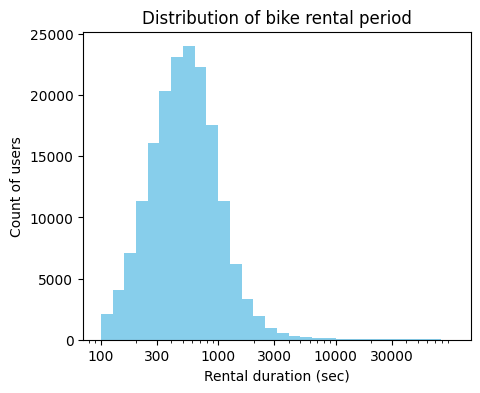

In [4]:
# Assign plot size
plt.figure(figsize = [5, 4])

# define bins
bins = 10 ** np.arange(2, 5+0.1, 0.1)

# Generate the x-ticks to be applied
ticks = [100, 300, 1000, 3000, 10000, 30000]

# Convert ticks into string values, to be displaye dlong the x-axis
labels = [f'{v}' for v in ticks]

# Plot the histogram
plt.hist(data=df, x='duration_sec', bins=bins, color='skyblue')

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels)

plt.xlabel('Rental duration (sec)')
plt.ylabel('Count of users')
plt.title('Distribution of bike rental period');

According to the Rental duration vs. count of users graph, it is clear that most users rent bikes for between 100 sec(~1.5min) to 3000 sec (50mins). Of which majority of rentals are for 300 sec (5 mins) to 1200 sec (20 mins).

## Visualization 2

### Rental distribution at different times over a day

To examine rental patterns throughout the day, we plotted the distribution of users by hour. This analysis utilizes the start_time data from the dataset to determine user activity at different times of the day.

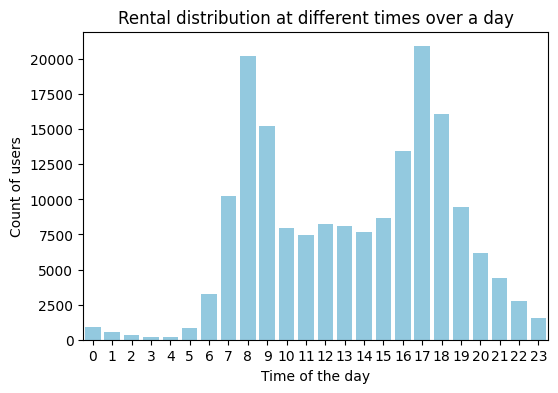

In [5]:
# Extract the time from the start_time column
df['hour_of_day'] = df['start_time'].dt.hour

# Assign plot size
plt.figure(figsize = [6, 4])

# Plot histogram
sns.countplot(data=df, x='hour_of_day', color='skyblue')
plt.title('Rental distribution at different times over a day')
plt.xlabel('Time of the day')
plt.ylabel('Count of users');

The bar plot of bike rentals by hour reveals a bimodal distribution, with demand peaking around 8 a.m. and 5 p.m. The plot also indicates minimal rental activity during the nighttime hours, specifically between midnight and 5 a.m. This is probably due to the office rush hours during morning and afternoon.

## Visualization 3

### Scatter plot for start point and end point


We aim to explore potential relationships between the start and end points of bike rentals by constructing a scatter plot.

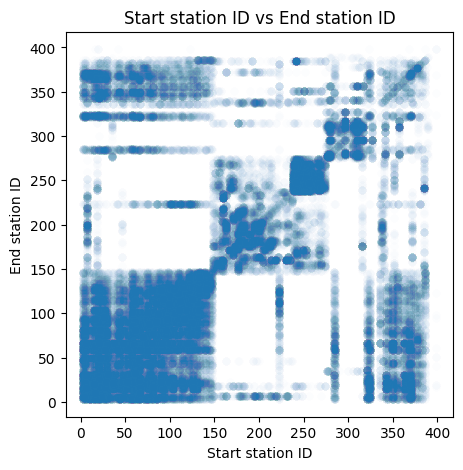

In [6]:
# Assign plot size
plt.figure(figsize = [5,5])

# Construct scatter plot for stations 3-398
sns.scatterplot(data=df, x='start_station_id', y='end_station_id', alpha=1/100)
plt.title('Start station ID vs End station ID')
plt.xlabel('Start station ID')
plt.ylabel('End station ID');

The scatter plot reveals distinct patterns in bike rental routes. Customers who begin their journey at stations with IDs ranging from 3 to 150 typically end their ride either at the same stations or at stations between 340 and 398. Those starting between stations 150 and 300 generally conclude their journey within the same range. Lastly, users starting at stations with IDs of 340 or higher often end their ride either at the same stations or at stations between 3 and 150.

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
